In [65]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import plot as pltfn
from sklearn.cluster import KMeans
import admin_functions as adfn
#plt.style.use('dark_background')
sns.reset_orig()
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [69]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
b_coordlist = sorted(glob.glob('*BLN*realcoord.npy'))
p_coordlist = sorted(glob.glob('*PTZ20*realcoord.npy'))
b_tracelist = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p_tracelist = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
b_coordlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_realcoord.npy']

In [73]:
#Calculate distance between cells
blnpcv, p20pcv = list(range(len(b_coordlist))),list(range(len(p_coordlist)))
for e in range(len(b_coordlist)):
    b_coord, p_coord = np.load(b_coordlist[e]), np.load(p_coordlist[e])
    b_mat, p_mat = np.zeros((b_coord.shape[0], b_coord.shape[0])), np.zeros((p_coord.shape[0], p_coord.shape[0]))
    coordlist, matlist = [b_coord,p_coord], [b_mat,p_mat]
    for t in range(len(coordlist)):
        for f in range(coordlist[t].shape[0]):
            for x in range(coordlist[t].shape[0]):
                matlist[t][f,x] =  np.linalg.norm(coordlist[t][f,:] - coordlist[t][x,:])
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, b_coordlist) + '_' + 'corr.npy', b_mat)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p_coordlist) + '_' + 'corr.npy', p_mat)
    print('Done fish #' + str(e))

Done fish #0
Done fish #1
Done fish #2
Done fish #3
Done fish #4
Done fish #5
Done fish #6
Done fish #7
Done fish #8
Done fish #9
Done fish #10


In [93]:
#Calculate correlation between cells - ENTIRE RECORDING
blnpcv, p20pcv = list(range(len(b_tracelist))),list(range(len(p_tracelist)))
for e in range(len(b_tracelist)):
    b_trace, p_trace = np.load(b_tracelist[e]), np.load(p_tracelist[e])
    b_mat, p_mat = np.zeros((b_trace.shape[0], b_trace.shape[0])), np.zeros((p_trace.shape[0], p_trace.shape[0]))
    tracelist, matlist = [b_trace,p_trace], [b_mat,p_mat]
    for t in range(len(tracelist)):
        for f in range(tracelist[t].shape[0]):
            for x in range(tracelist[t].shape[0]):
                matlist[t][f,x] =  np.corrcoef(tracelist[t][f,:],tracelist[t][x,:])[0][1]
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, b_tracelist) + '_' + 'corr.npy', b_mat)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p_tracelist) + '_' + 'corr.npy', p_mat)
    print('Done fish #' + str(e))

Done fish #0
Done fish #1
Done fish #2
Done fish #3
Done fish #4
Done fish #5
Done fish #6


KeyboardInterrupt: 

In [19]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnraw, p20raw

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTY

# Standard threshold

* periods of high correlation - define threshold
* sliding window - when does the variance increase above threshold - define as start of seizure event

# State space trajectory

Preprocess
* optimise r - number of factors

Detect
* Baseline - weights over time
* probability of factors increasing together - probability matrix between different factors
* decompose just matrix w on ptz - find correlated factors falling outside of baseline probability

OR
* calculate euclidean distance (or geodesic) from many PC/factor dimensions
* fit to baseline data
* Bayesian model comparison - what distribution?
* fit gamma (or gaussian) - MLE
* use cutoff based from baseline fitted distribution

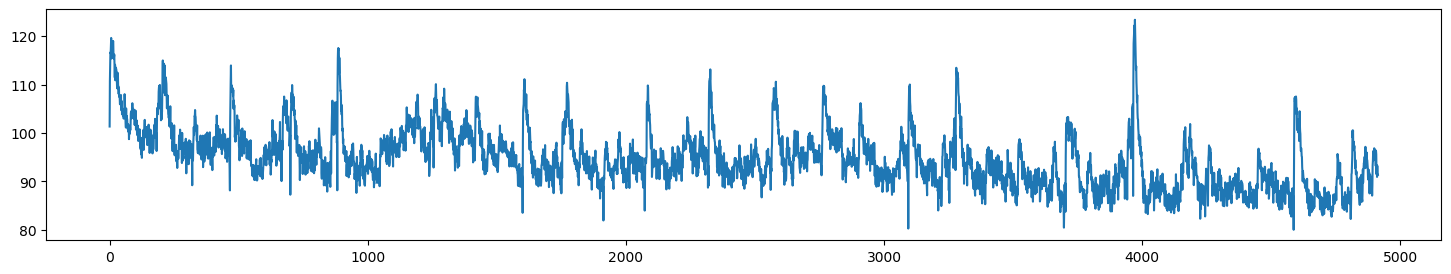

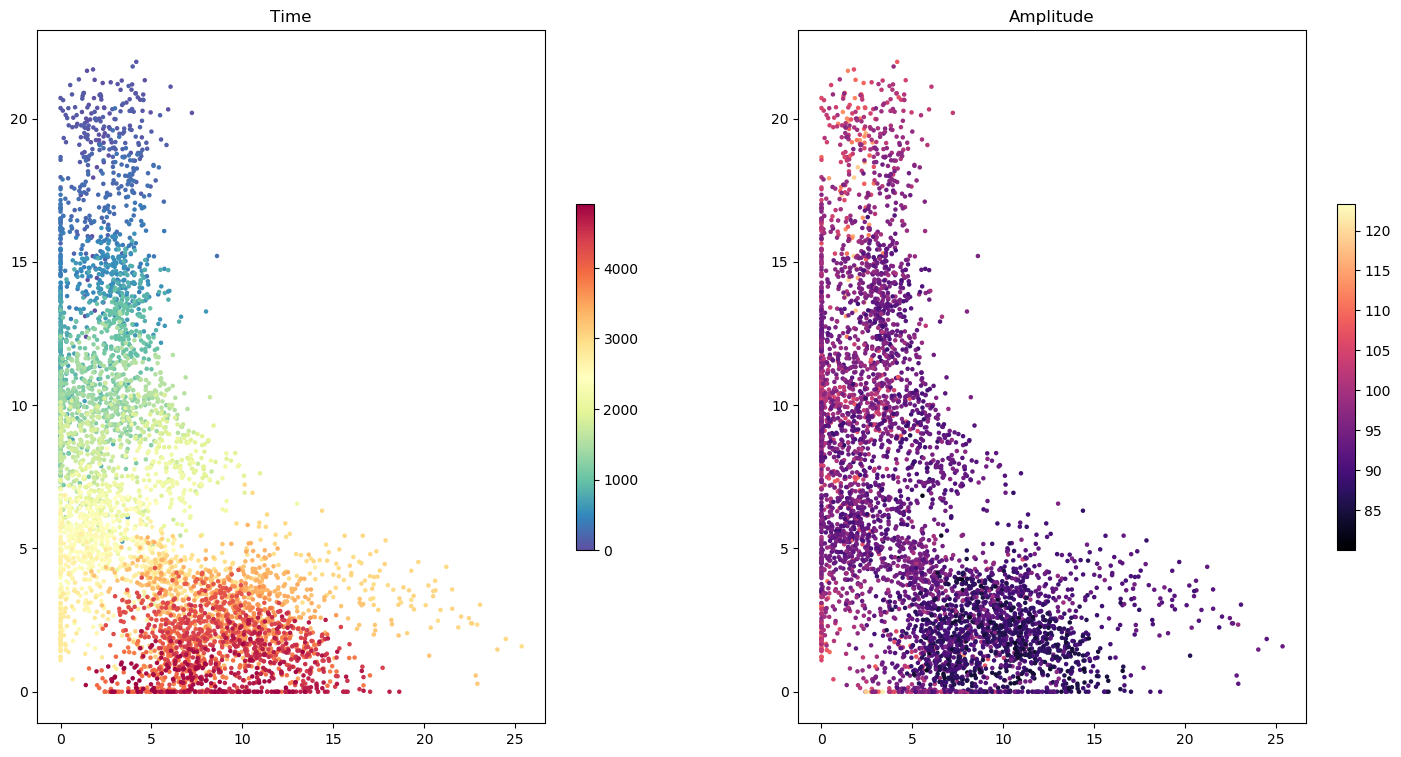

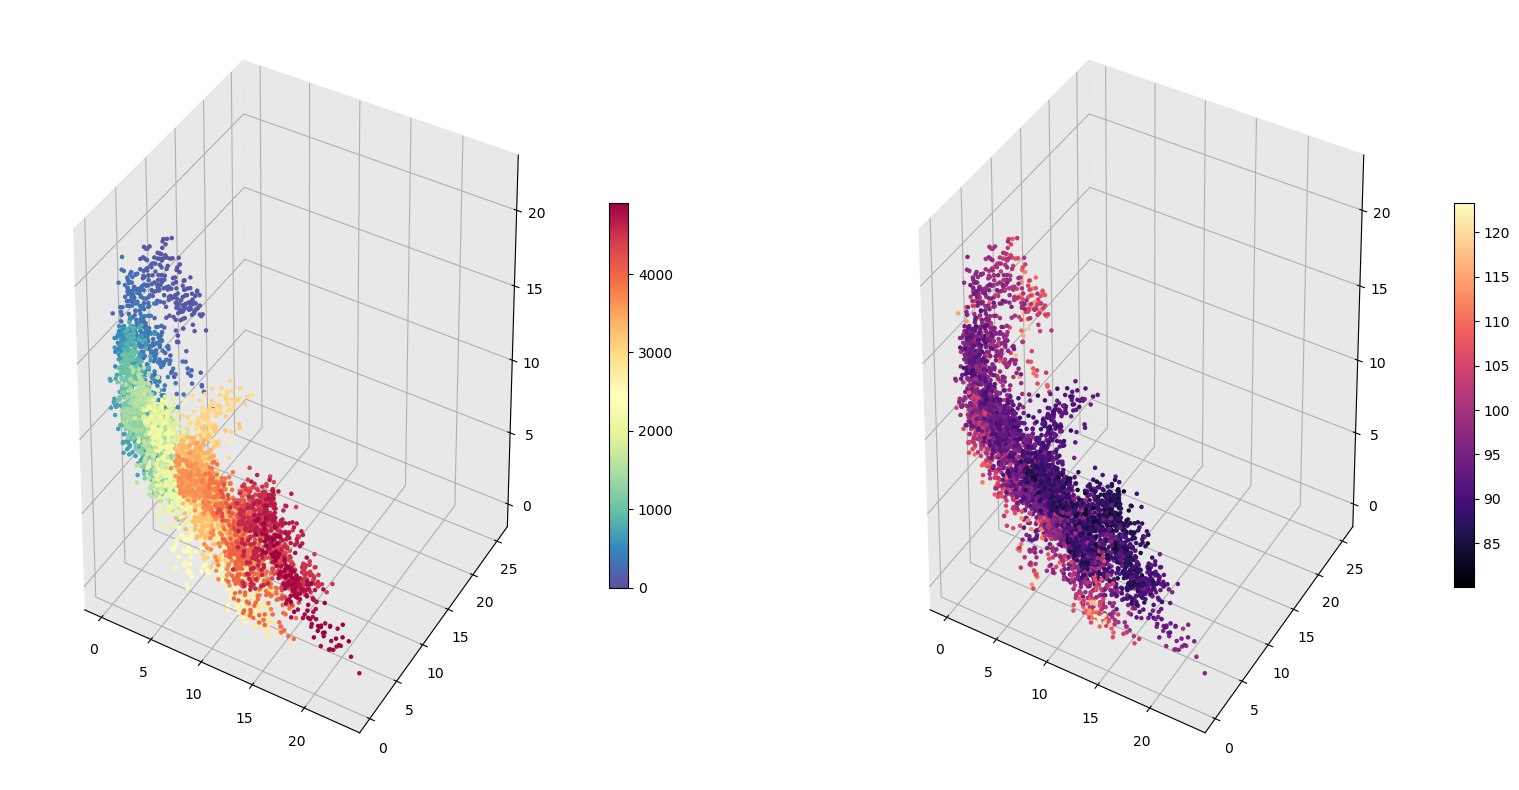

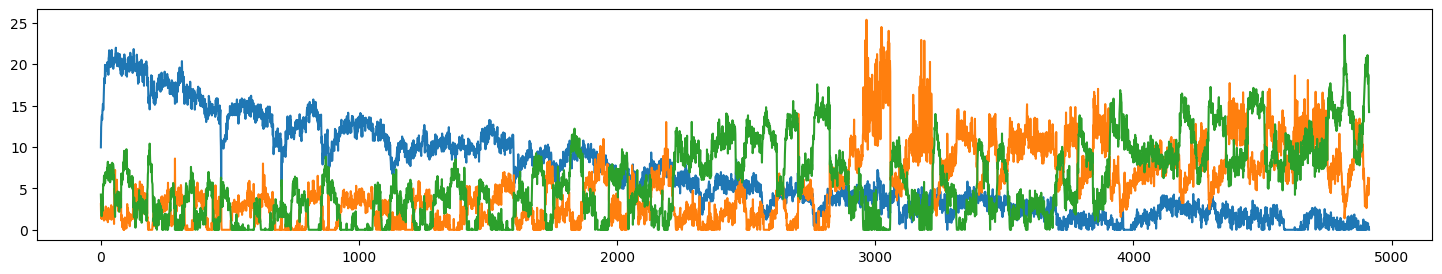

In [10]:
#matrix factorisation - time frames
#---------------------------------
i, n_components = 9, 4
bln = np.load(blnraw[i])

#PLOT TRACE AVERAGE
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)

#NON-NEGATIVE MATRIX FACTORISATION
from sklearn import decomposition
nmf = decomposition.NMF(n_components)
fit = nmf.fit(bln - np.min(bln)) #Make matrix entirely positive
fig, axarr = plt.subplots(1,2, figsize= (18,9))
dotplot = axarr[0].scatter(fit.components_[2,:], fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
axarr[0].set_title('Time')
fig.colorbar(dotplot, ax=axarr[0], shrink = 0.5)
dotplot = axarr[1].scatter(fit.components_[2,:], fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
axarr[1].set_title('Amplitude')
fig.colorbar(dotplot, ax=axarr[1], shrink = 0.5)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)
ax = fig.add_subplot(1, 2, 2, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)

fig, ax = plt.subplots(figsize= (18,3))
for i in range(3):
    plt.plot(fit.components_[i+1])

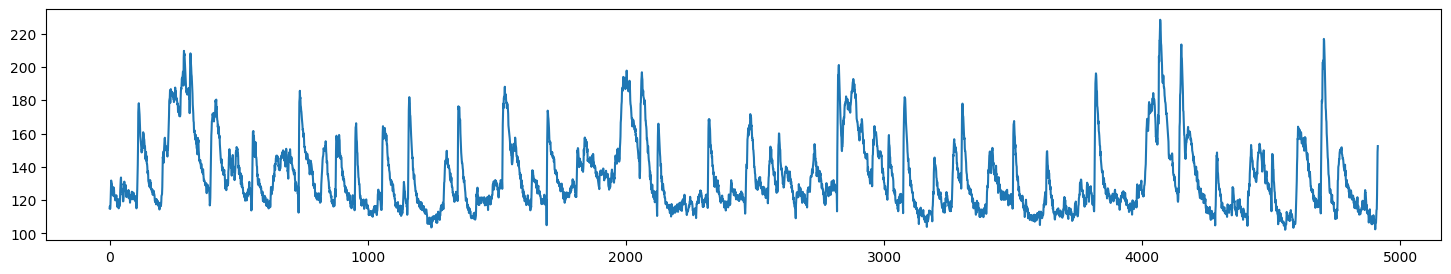

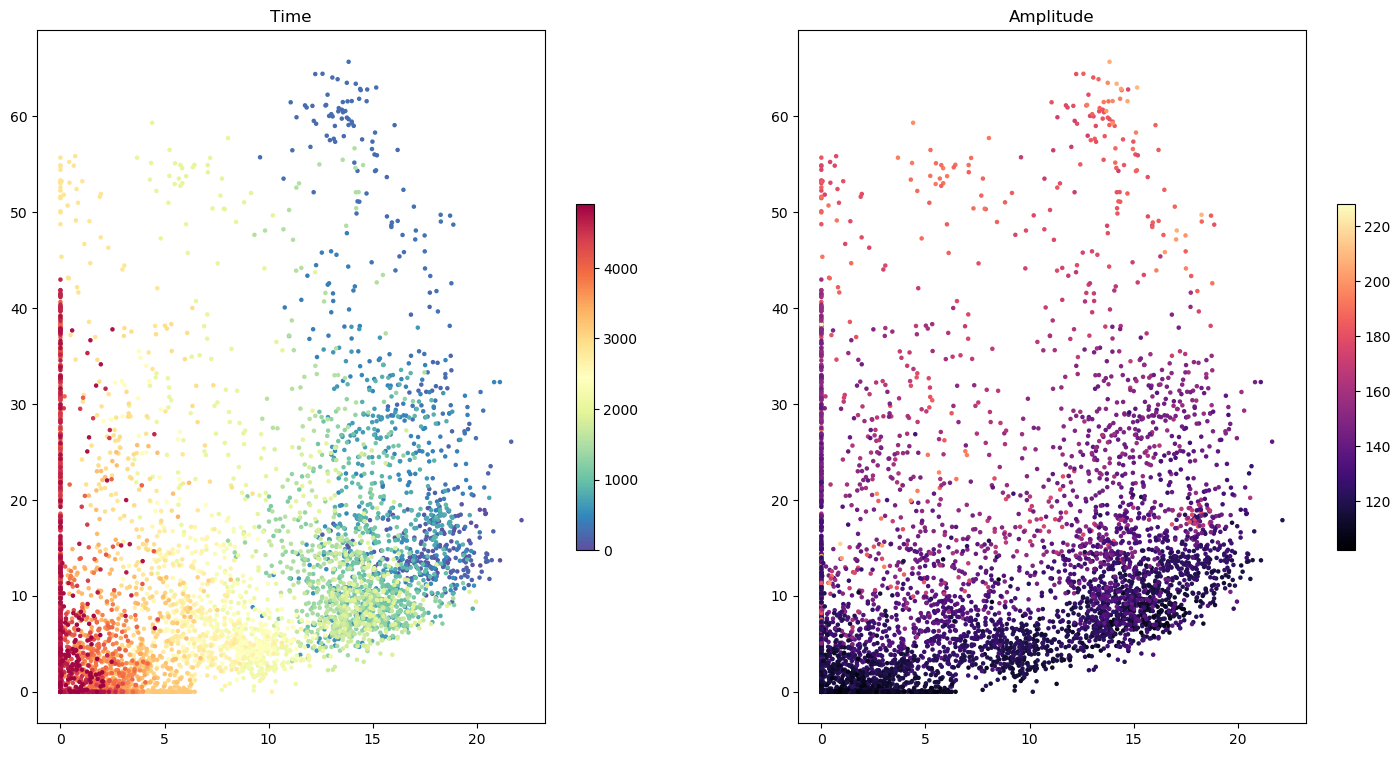

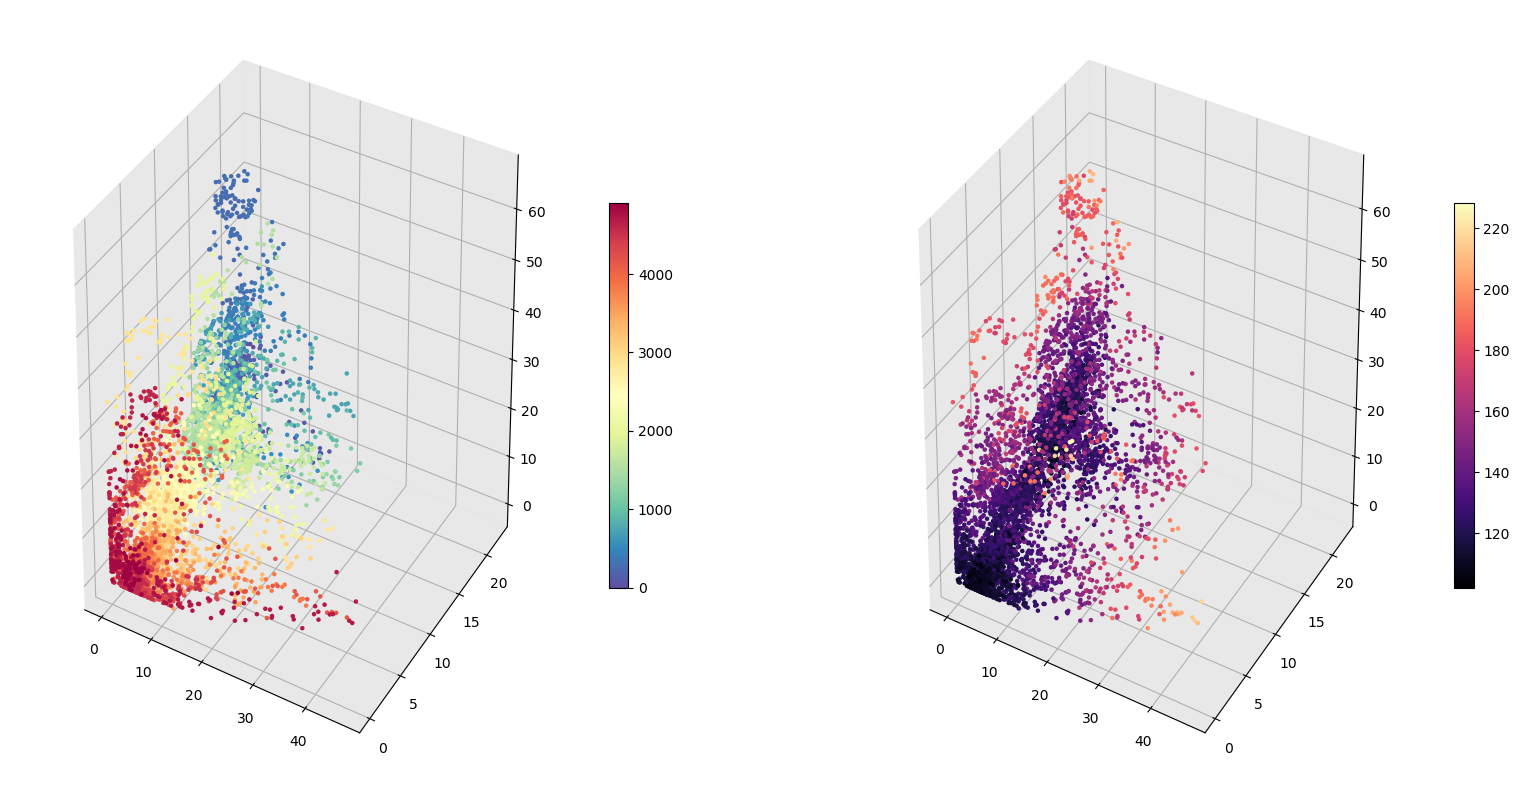

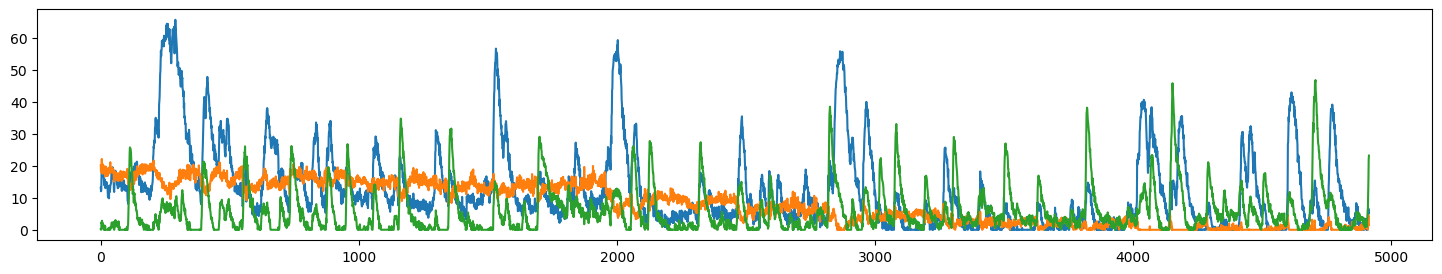

In [11]:
#matrix factorisation - time frames
#---------------------------------
i, n_components = 9, 4
p20 = np.load(p5raw[i])

#PLOT TRACE AVERAGE
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

#NON-NEGATIVE MATRIX FACTORISATION
from sklearn import decomposition
nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20)) #Make matrix entirely positive
fig, axarr = plt.subplots(1,2, figsize= (18,9))
dotplot = axarr[0].scatter(fit.components_[2,:], fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
axarr[0].set_title('Time')
fig.colorbar(dotplot, ax=axarr[0], shrink = 0.5)
dotplot = axarr[1].scatter(fit.components_[2,:], fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
axarr[1].set_title('Amplitude')
fig.colorbar(dotplot, ax=axarr[1], shrink = 0.5)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)
ax = fig.add_subplot(1, 2, 2, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)

fig, ax = plt.subplots(figsize= (18,3))
for i in range(3):
    plt.plot(fit.components_[i+1])

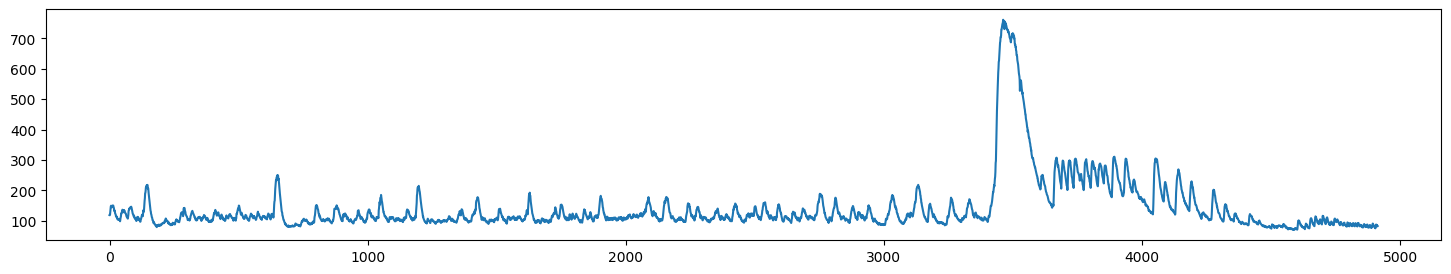

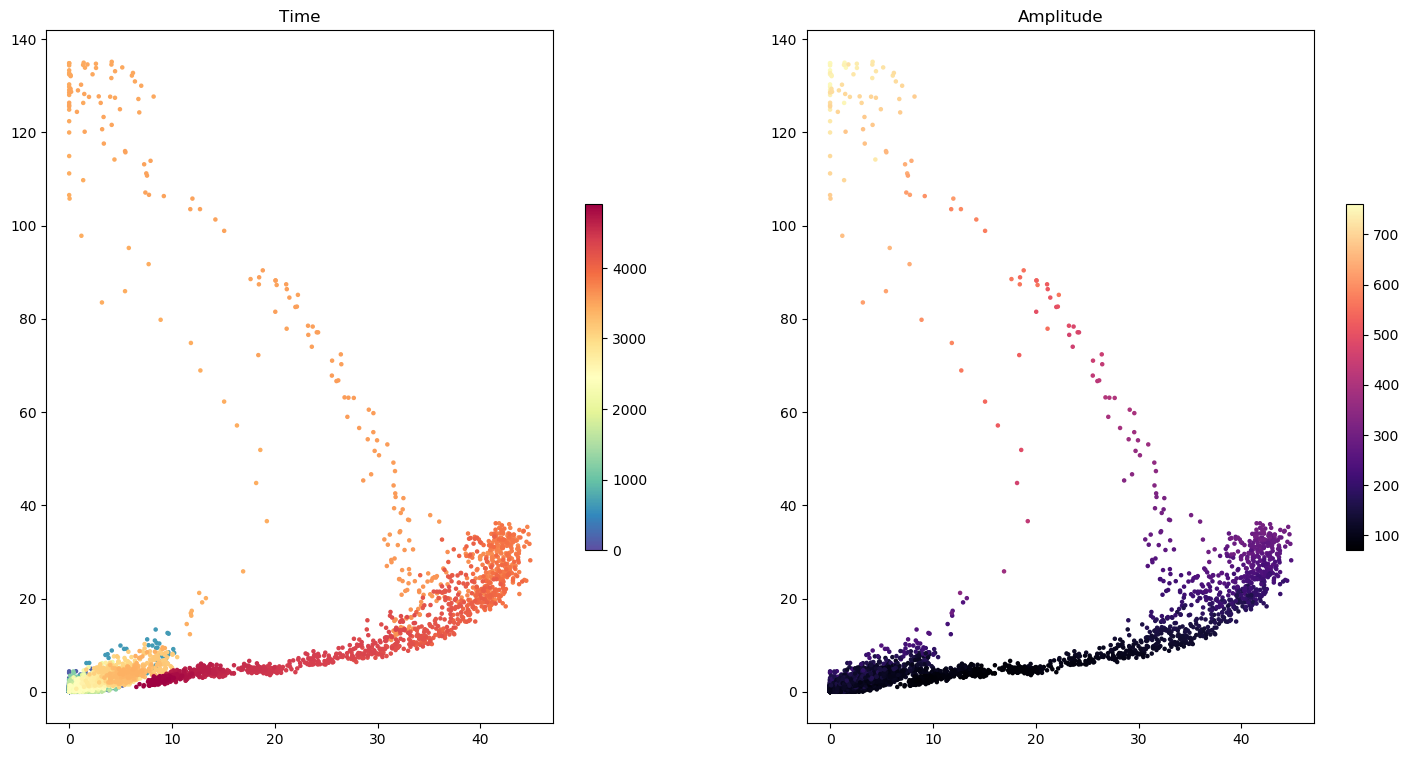

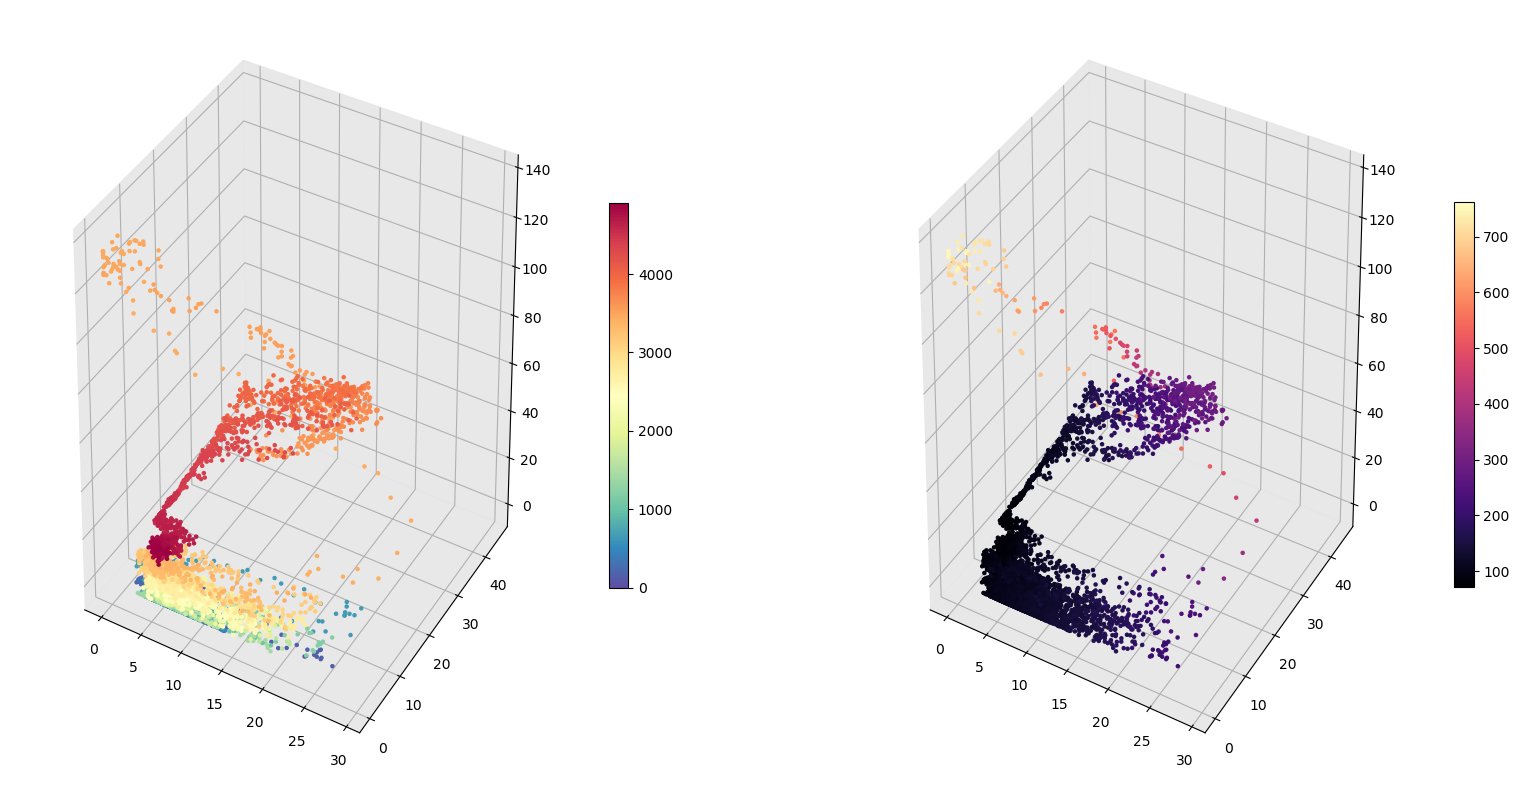

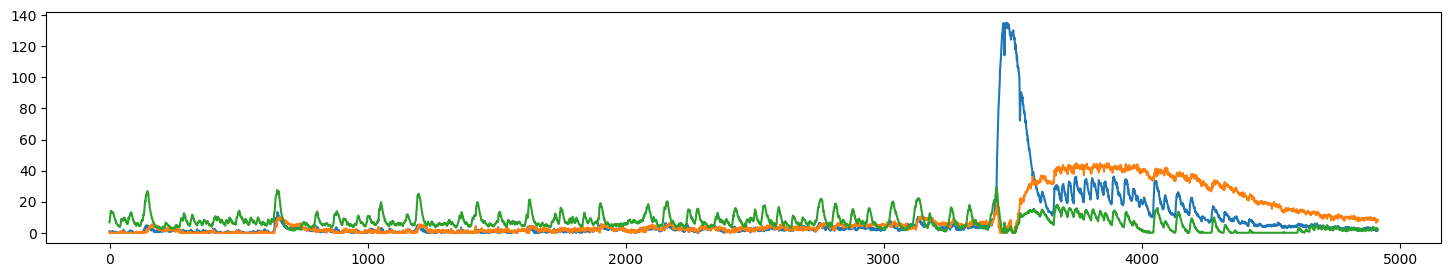

In [12]:
#matrix factorisation - time frames
#---------------------------------
i, n_components = 9, 4
p20 = np.load(p20raw[i])

#PLOT TRACE AVERAGE
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

#NON-NEGATIVE MATRIX FACTORISATION
from sklearn import decomposition
nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20)) #Make matrix entirely positive
fig, axarr = plt.subplots(1,2, figsize= (18,9))
dotplot = axarr[0].scatter(fit.components_[2,:], fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
axarr[0].set_title('Time')
fig.colorbar(dotplot, ax=axarr[0], shrink = 0.5)
dotplot = axarr[1].scatter(fit.components_[2,:], fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
axarr[1].set_title('Amplitude')
fig.colorbar(dotplot, ax=axarr[1], shrink = 0.5)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)
ax = fig.add_subplot(1, 2, 2, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)

fig, ax = plt.subplots(figsize= (18,3))
for i in range(3):
    plt.plot(fit.components_[i+1])

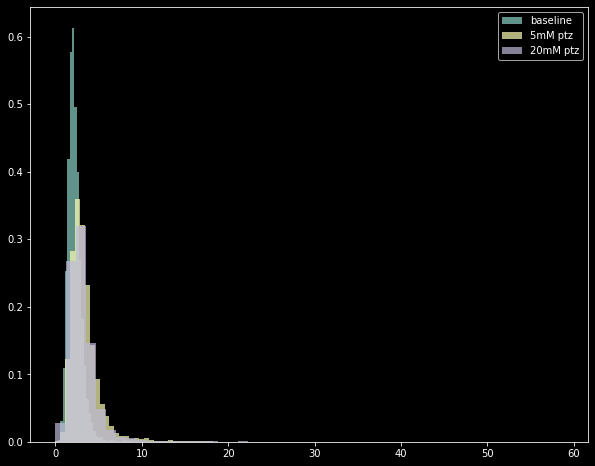

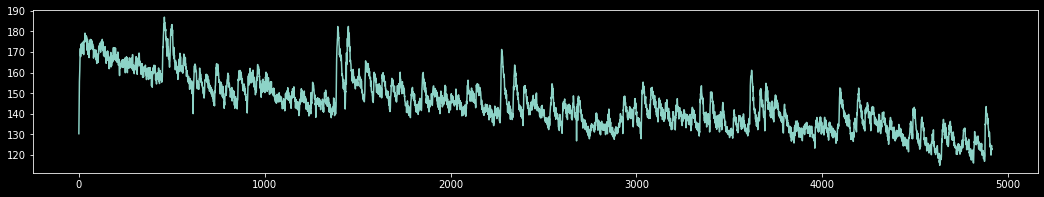

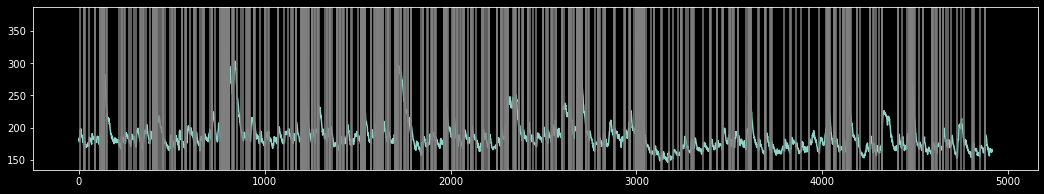

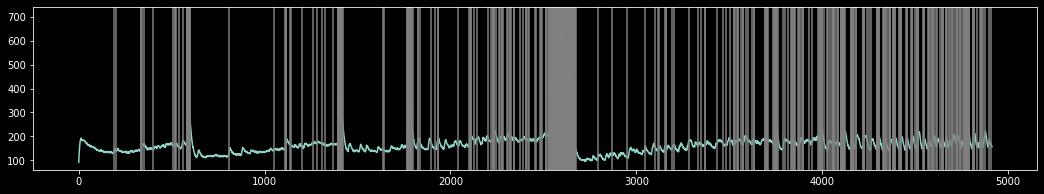

In [25]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 0, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

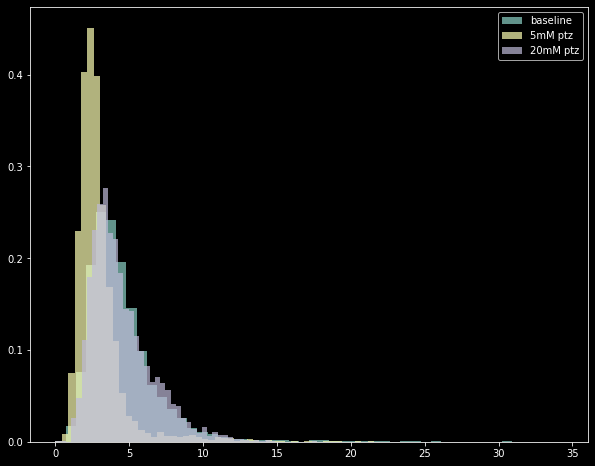

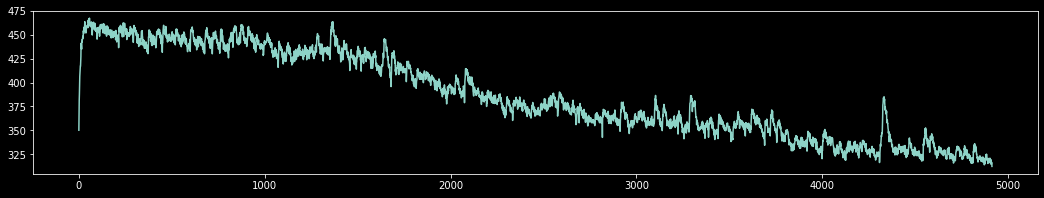

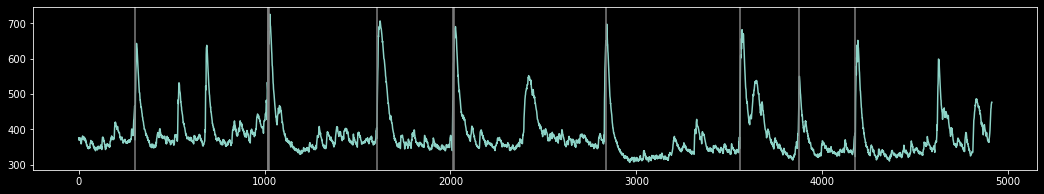

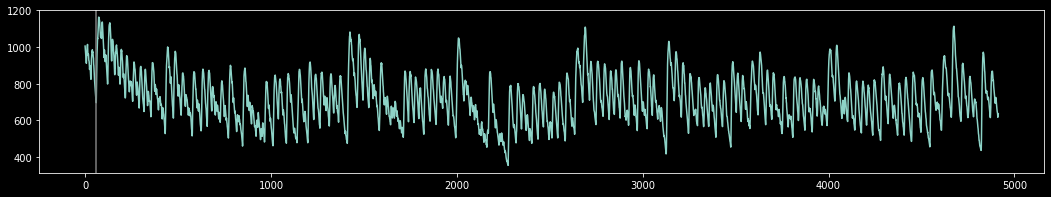

In [24]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 1, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

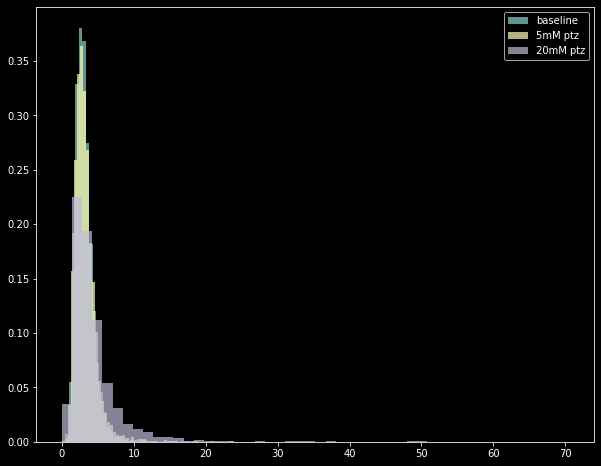

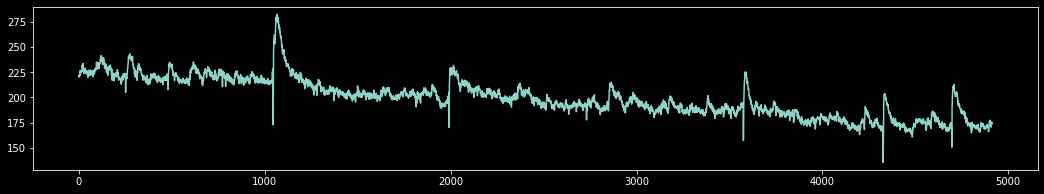

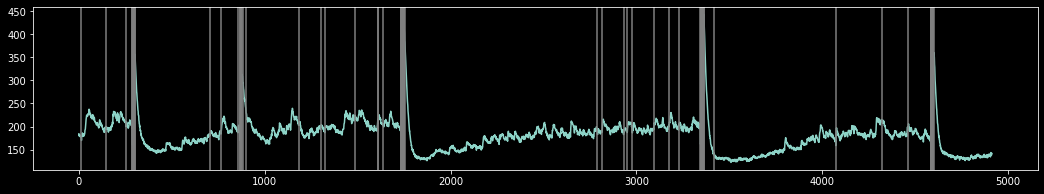

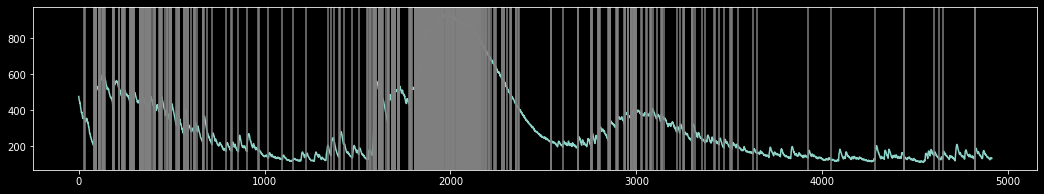

In [23]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 2, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

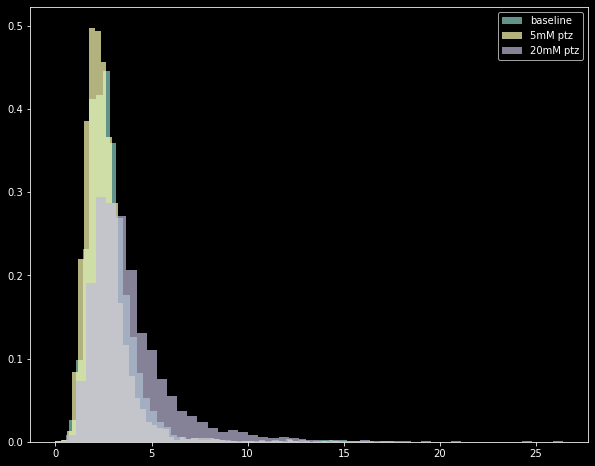

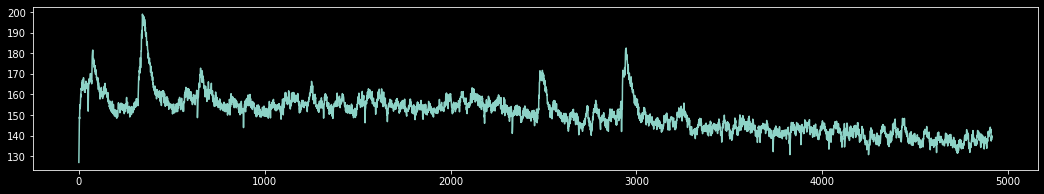

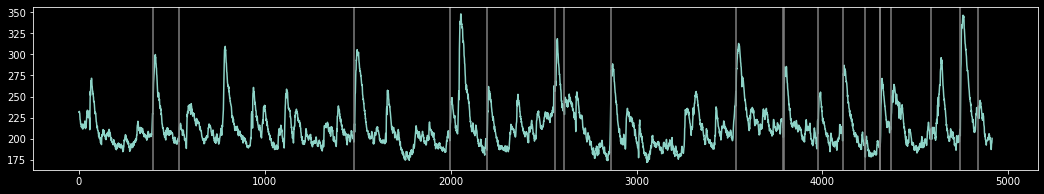

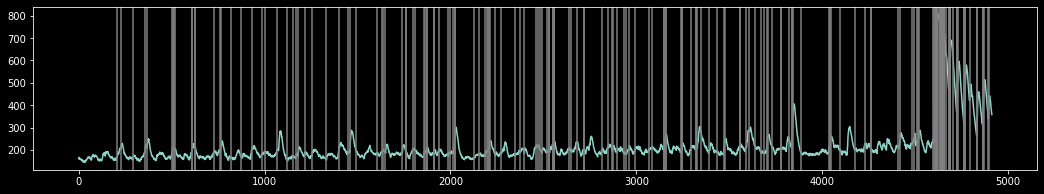

In [22]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 3, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

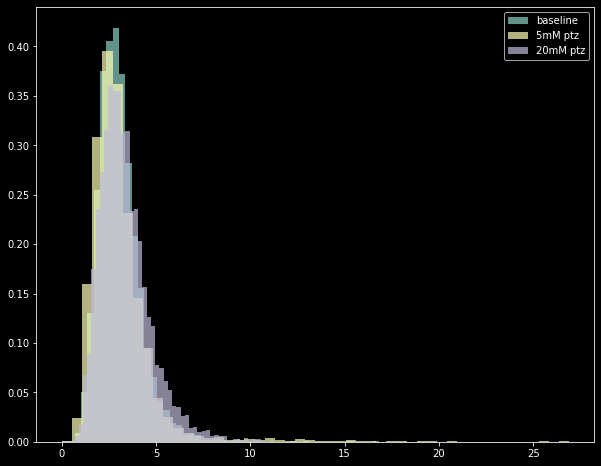

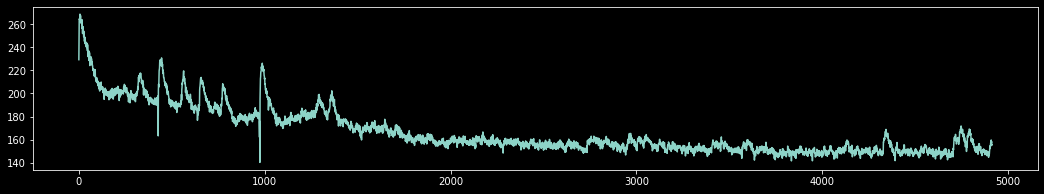

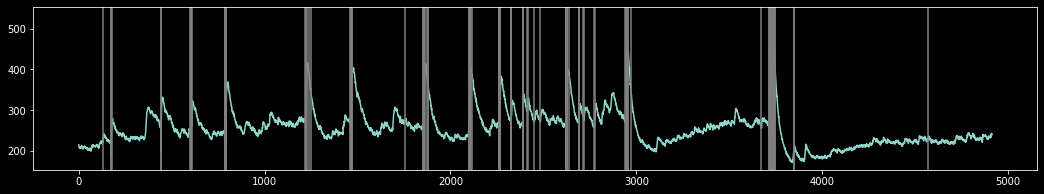

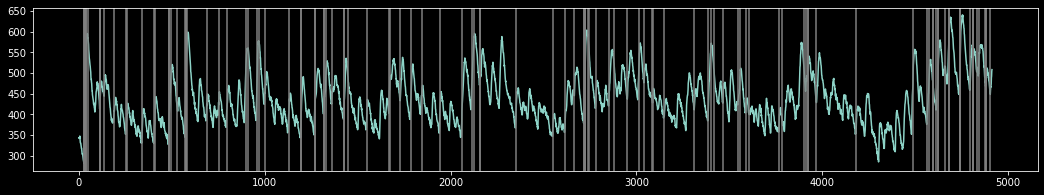

In [21]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 4, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

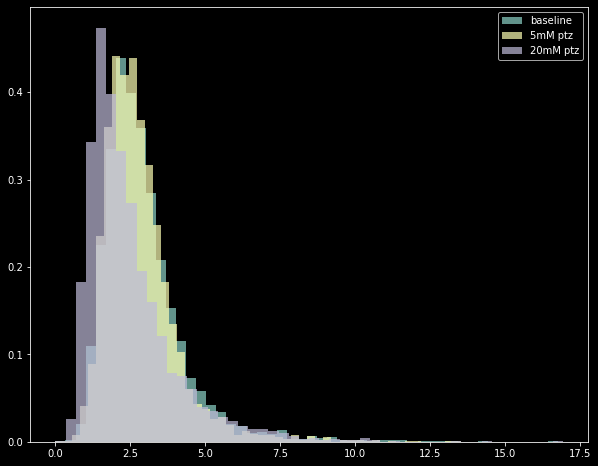

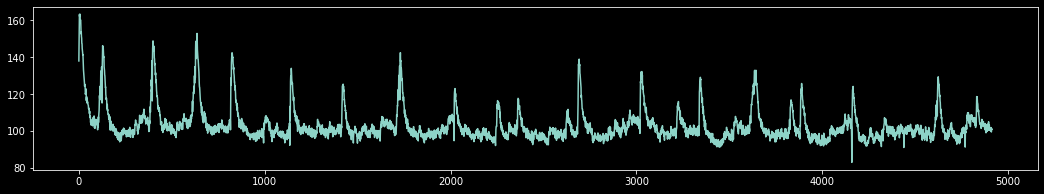

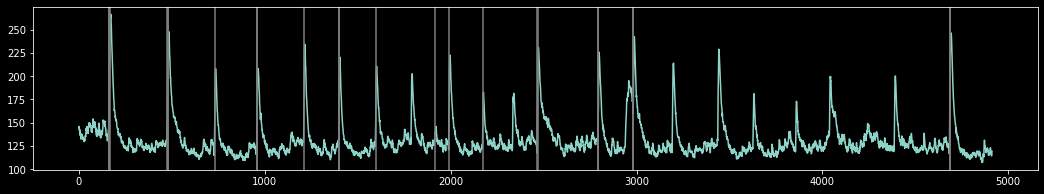

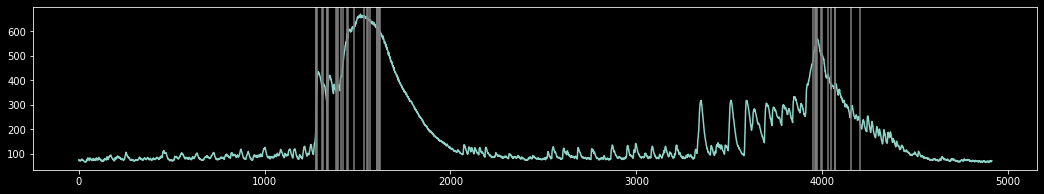

In [20]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 5, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

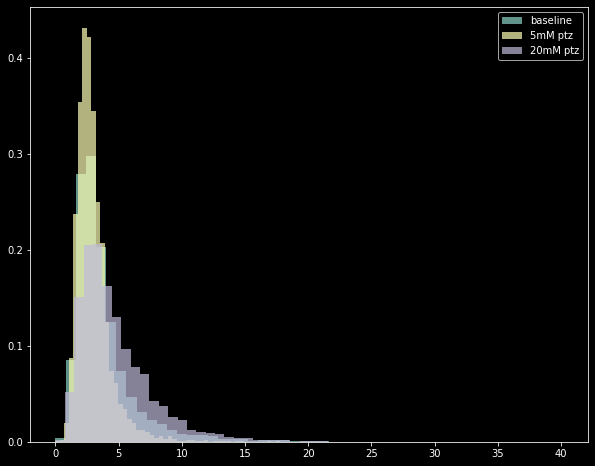

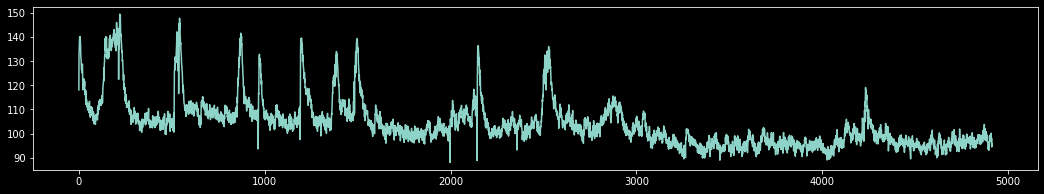

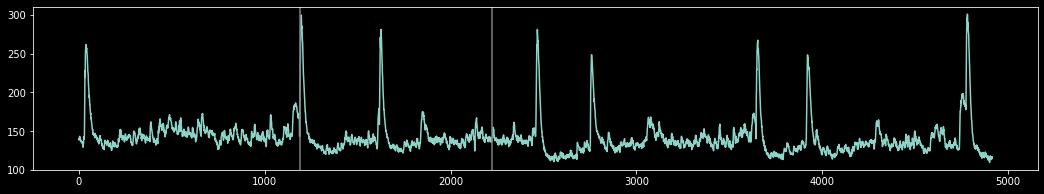

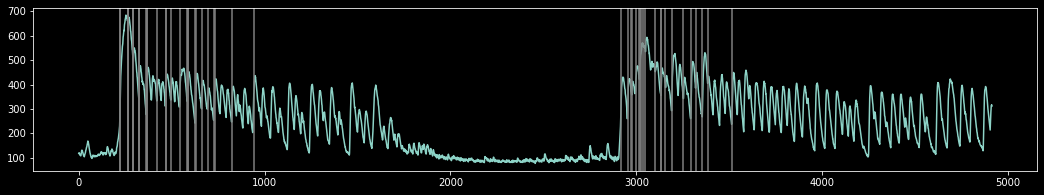

In [19]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 6, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

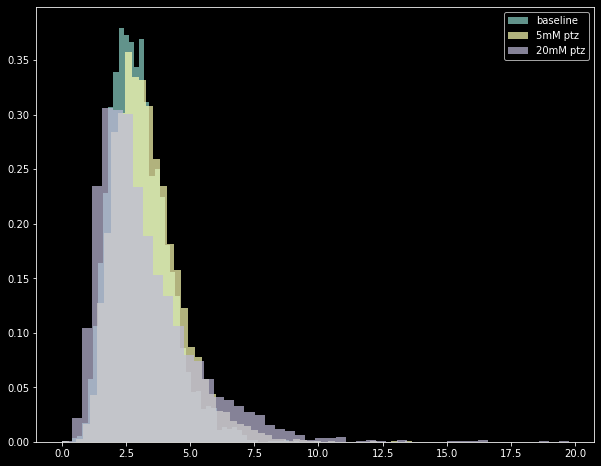

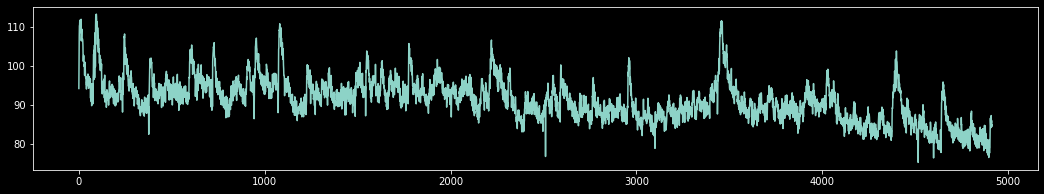

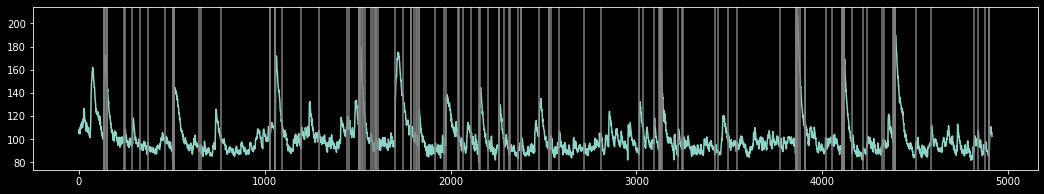

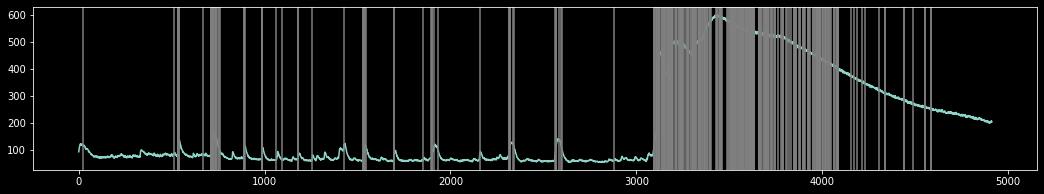

In [18]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 7, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

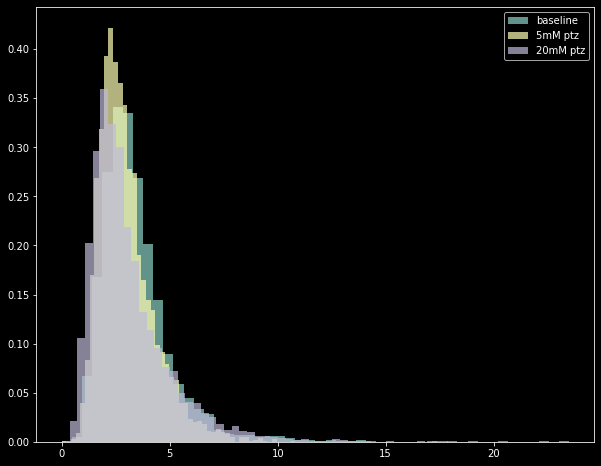

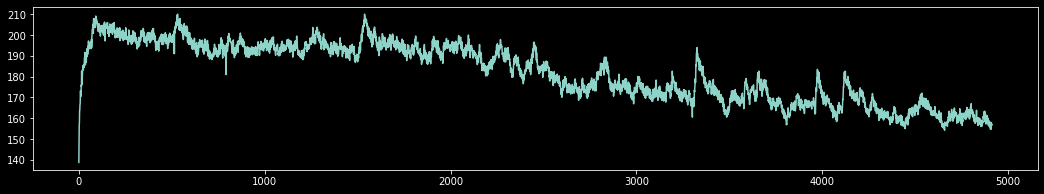

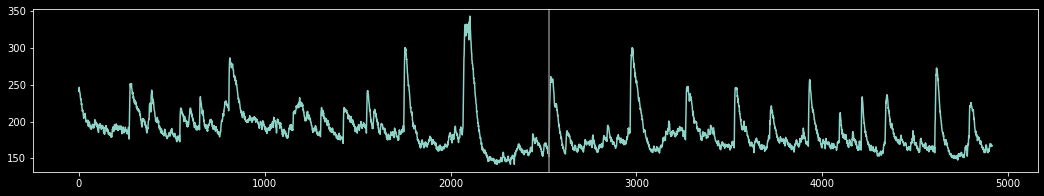

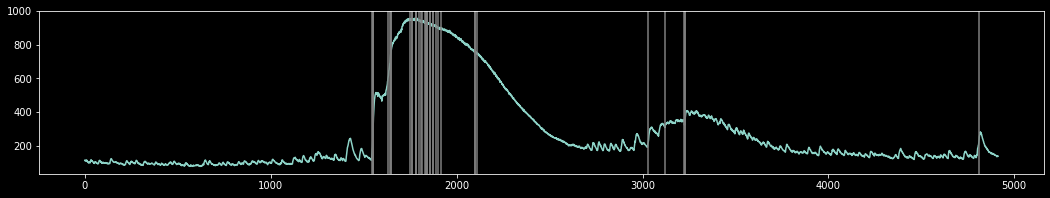

In [17]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 8, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

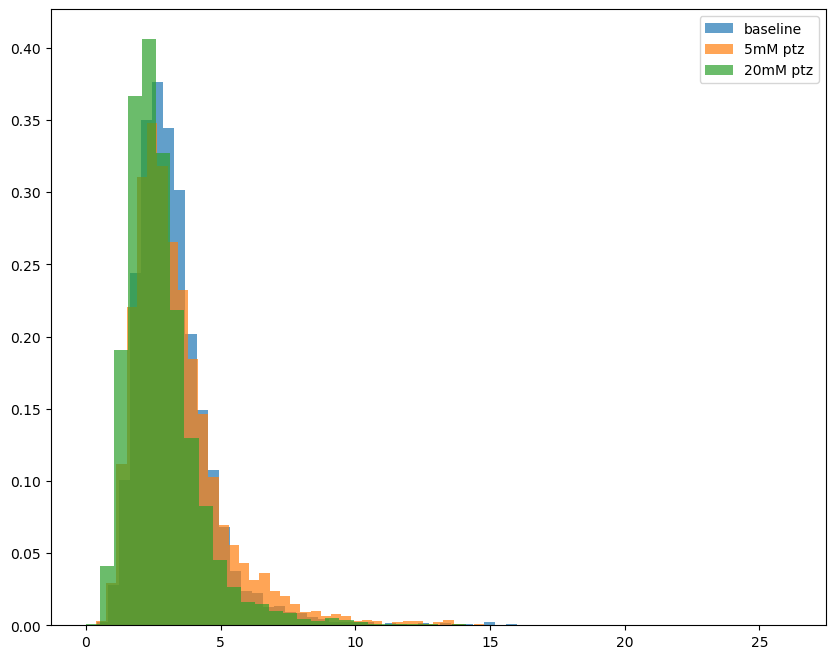

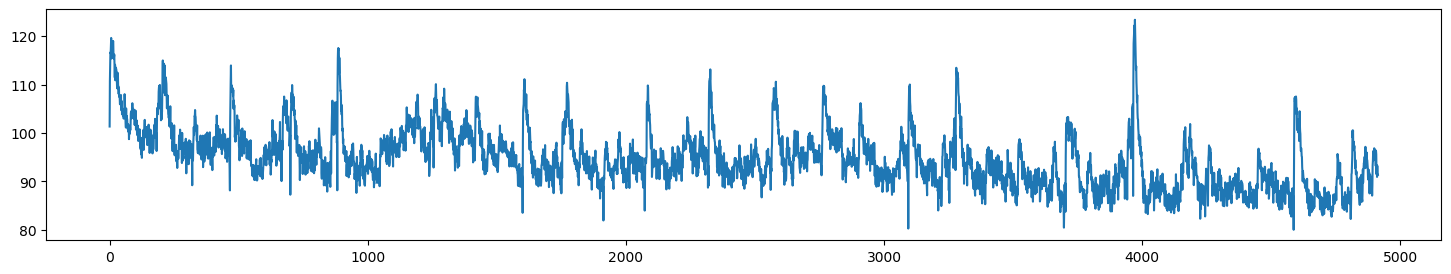

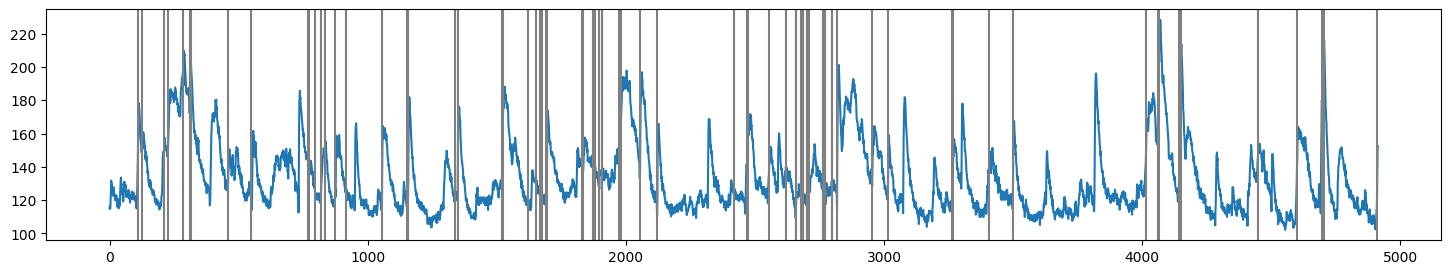

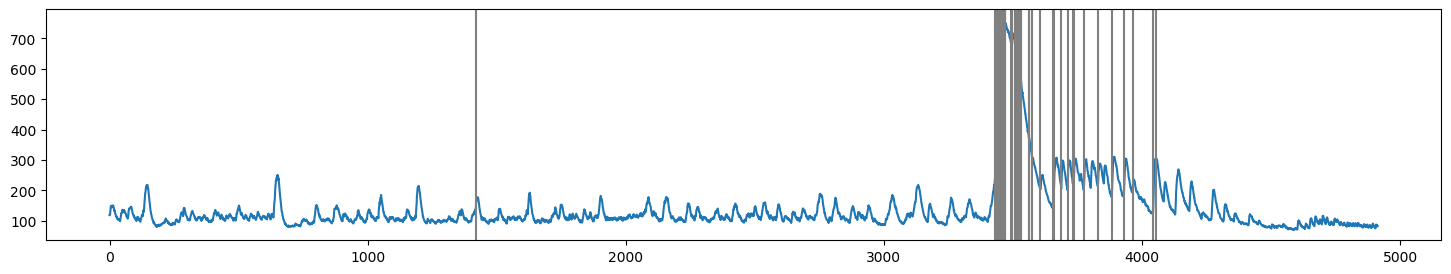

In [13]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 9, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

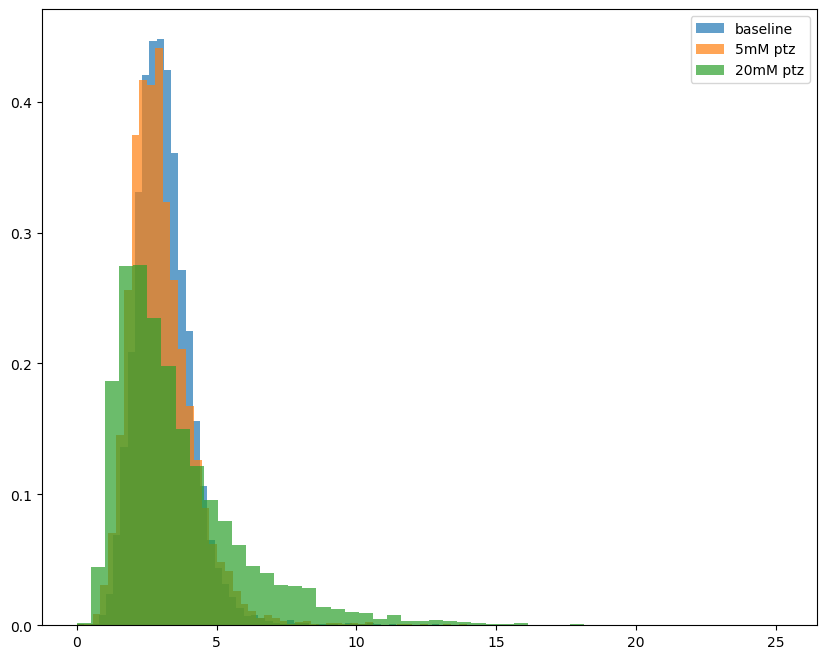

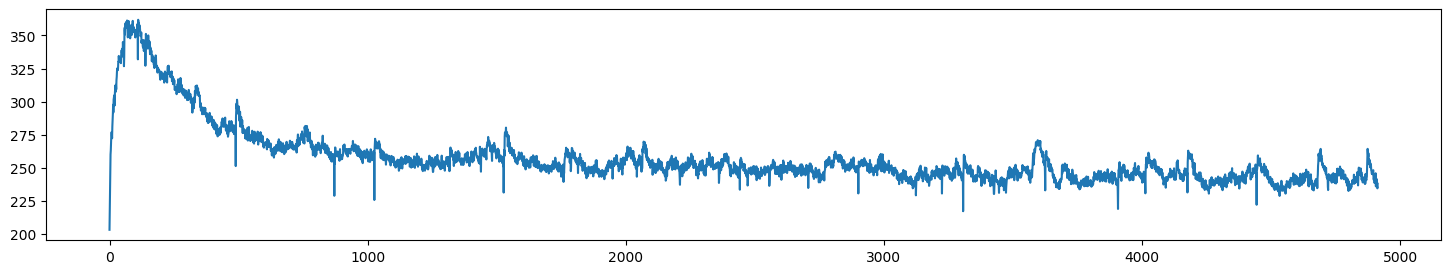

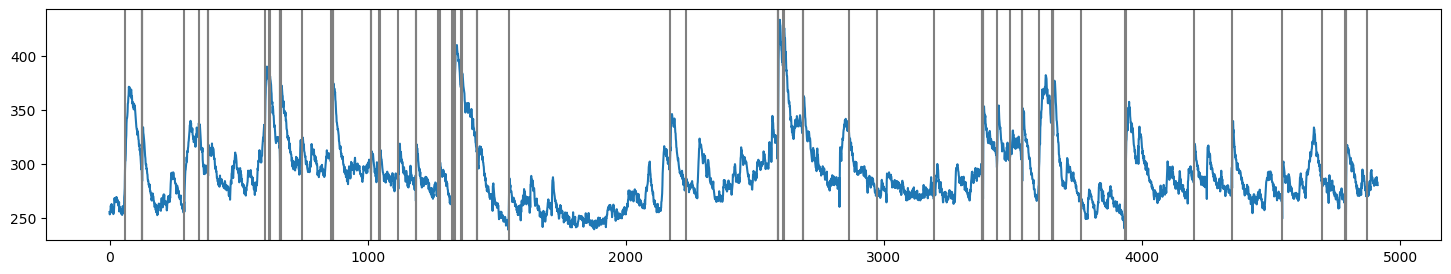

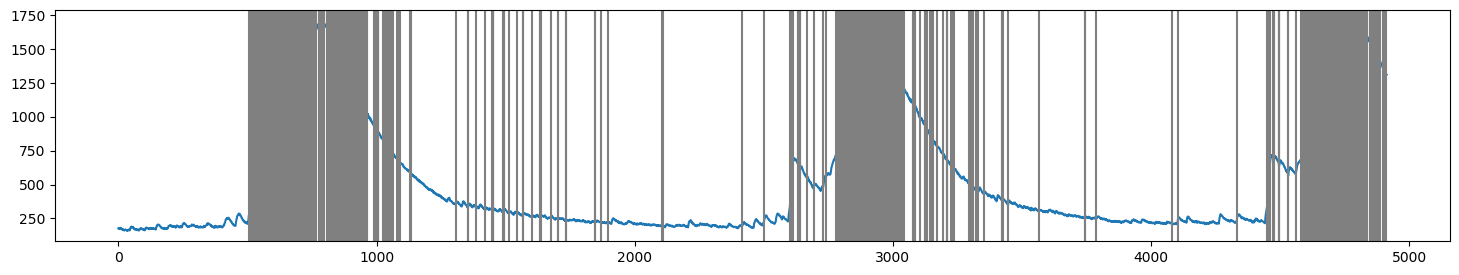

In [14]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 10, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

In [ ]:
# Support vector machine

In [ ]:

1. Delta f/f - normalise data before classsifying
—-i.e. removed baseline at each time point in pixels 
—better to be done on filtered data

2. Pool data across multiple fish - register to standard brain

3. Spatial scale features - break down pixels into spaitaially integrating units - or cells
—-downsampling

4. Temporal scale features - downsample time as well?
Across dataset normalisation 

Correlation
Train ROis over time 
Integrate correlative features into dff data 